# House Price Prediction

## Dataset:
You can use any publicly available dataset such as Kaggle's House Price Prediction Dataset or California Housing Dataset (from Scikit-learn).


I am making use of the California Housing Dataset for this purpose. Here we fetch the dataset form sklearn datasets module. 

In [1]:
from sklearn.datasets import fetch_california_housing

# Download the dataset
california = fetch_california_housing()

# View dataset description
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# 1. Data Preprocessing

## Load the dataset and perform exploratory data analysis (EDA): 
Here, we convert the dataset downloaded into a DataFrame. We check the shape of the DataFrame to get an idea of the size of the dataset and also print the first five columns. 

We also find the description of the dataset to understand the structure of the data and find missing values. 

In [2]:
import pandas as pd

# Convert the downloaded dataset to a DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df["Target"] = california.target

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df.median(numeric_only=True)

MedInc           3.534800
HouseAge        29.000000
AveRooms         5.229129
AveBedrms        1.048780
Population    1166.000000
AveOccup         2.818116
Latitude        34.260000
Longitude     -118.490000
Target           1.797000
dtype: float64

In [7]:
# Prints True if there are any NaN values in any of the columns
print("Are there any missing values in the dataframe:", df.isna().any().any())

Are there any missing values in the dataframe: False


In [8]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Column", "Missing Values"]

# Set alignment for the first column to be left-aligned
table.align["Column"] = "l"

# Add rows to the table
for column in df.columns:
    table.add_row([column, df[column].isna().sum()])

# Print the table
print(table)

+------------+----------------+
| Column     | Missing Values |
+------------+----------------+
| MedInc     |       0        |
| HouseAge   |       0        |
| AveRooms   |       0        |
| AveBedrms  |       0        |
| Population |       0        |
| AveOccup   |       0        |
| Latitude   |       0        |
| Longitude  |       0        |
| Target     |       0        |
+------------+----------------+


In [9]:
# This gives us information about the columns in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Analysis: 
1. There are no missing values in the dataset. Hencec, we don't need to handle missign values.
2. All the features of the dataset are numerical. So, we don't need to worry about categorical variable encoding

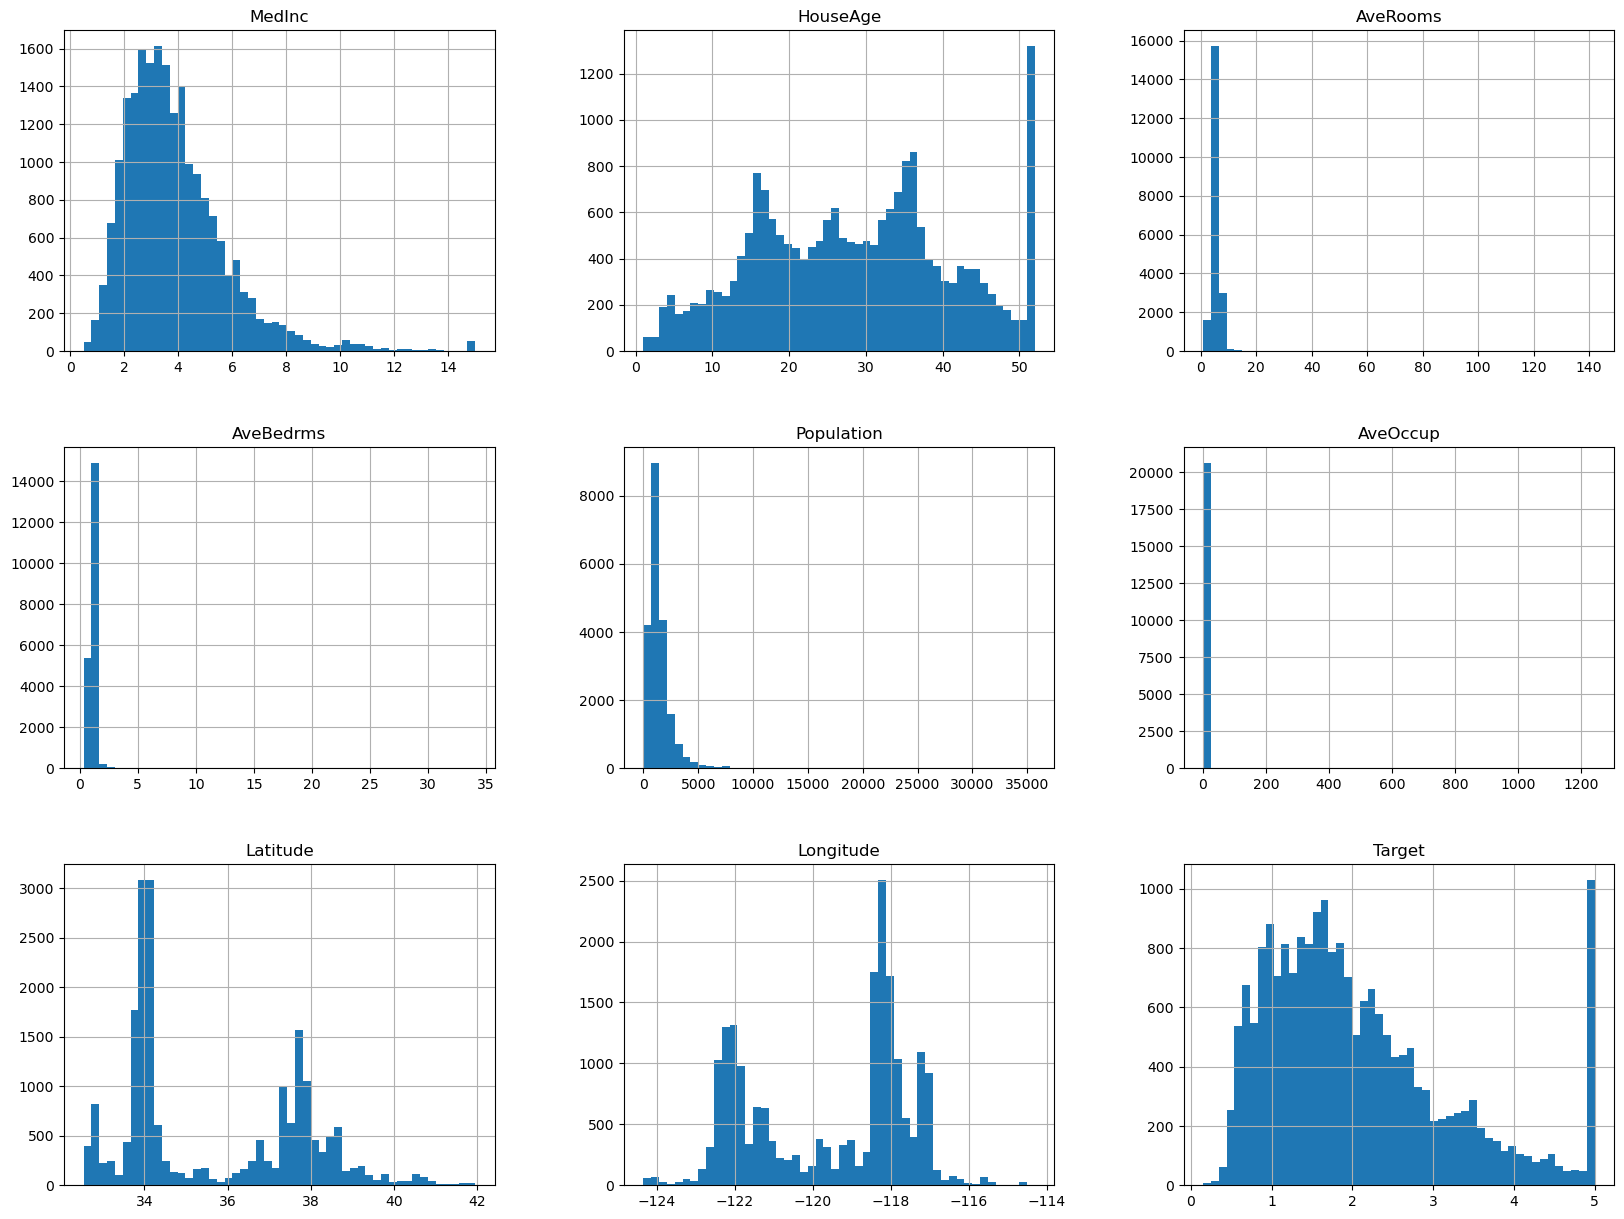

In [10]:
%matplotlib inline
# Now we will plot the histograms of all the columns in the DataFrame
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

# Analysis:
1. The median income attribute does not look like it is expressed in US dollars (USD). It is likely that this column is preprocessed. 
2. The housing median age and the median house value are capped. The latter may be a serious problem since it is our target attribute. Our Machine Learning algorithms may learn that prices never go beyond that limit. We remove those districts from the training set (and also from the test set). This will ensure that our algorithm will not learn that the prices should be capped at $500,000 and it will not be penalized if it does predict prices beyond this upper cap range.
3. Many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will need to transform these attributes later on to have more bell-shaped distributions.

<Axes: >

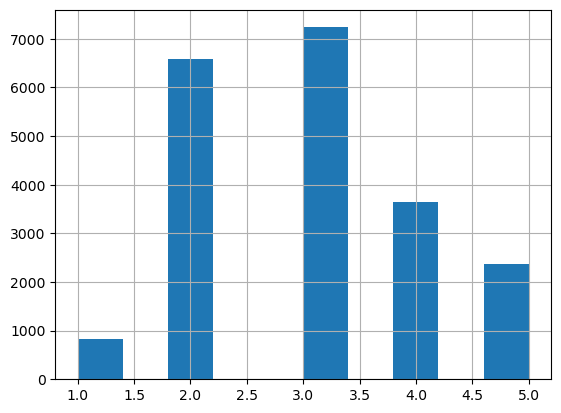

In [11]:
# Suppose we think median income is an important feature. We can plot a histogram of various levels of the median income to see how is the data distributed. 
# This will help us in deciding how to split the data into training and testing sets.
 
import numpy as np
df["income_cat"] = pd.cut(df["MedInc"],
        bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
        labels=[1, 2, 3, 4, 5])
df["income_cat"].hist()

# Analysis: 
The histogram above shows that there are significant disparities in the median income. Hence, we are better off doing a stratified train test split with the median income levels as the strata.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    df_train_set = df.loc[train_index]
    df_test_set = df.loc[test_index]

In [13]:
# Now you should remove the income_cat attribute so the data is back to its original state:

df_train_set.drop("income_cat", axis=1, errors='ignore', inplace=True)
df_test_set.drop("income_cat", axis=1, errors='ignore', inplace=True)

In [14]:
train_labels = df_train_set["Target"].copy()
train_data = df_train_set.drop("Target", axis=1)

<Axes: xlabel='Longitude', ylabel='Latitude'>

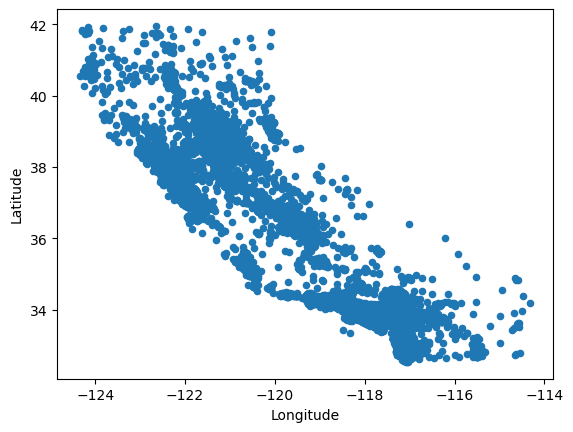

In [15]:
df_train_set.plot(kind="scatter", x="Longitude", y="Latitude")

<Axes: xlabel='Longitude', ylabel='Latitude'>

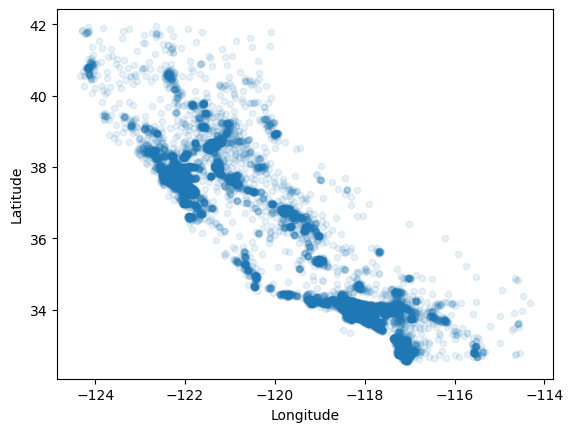

In [16]:
df_train_set.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)

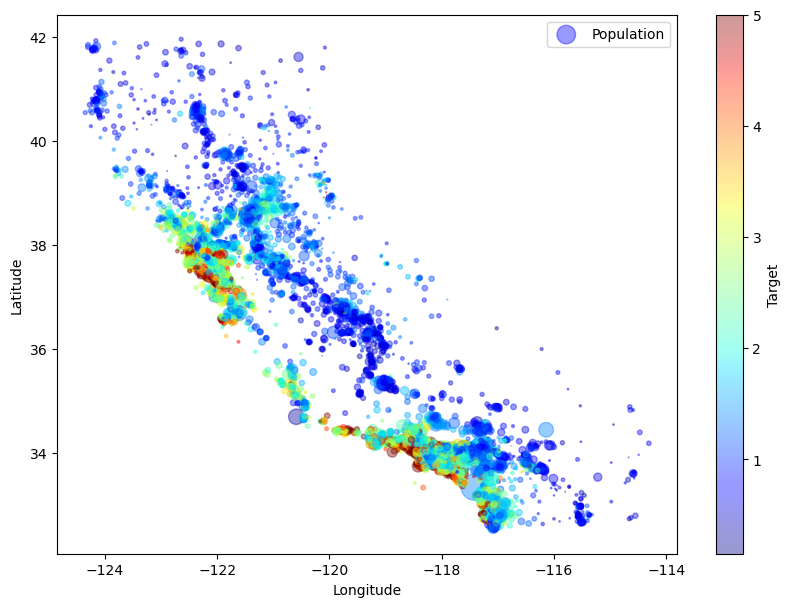

In [17]:
df_train_set.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
s=df_train_set["Population"]/100, label="Population", figsize=(10,7),
c="Target", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [18]:
corr_matrix = df_train_set.corr()
corr_matrix["Target"].sort_values(ascending=False)

Target        1.000000
MedInc        0.687151
AveRooms      0.146255
HouseAge      0.114146
AveOccup     -0.021991
Population   -0.026882
AveBedrms    -0.043294
Longitude    -0.047466
Latitude     -0.142673
Name: Target, dtype: float64

array([[<Axes: xlabel='Target', ylabel='Target'>,
        <Axes: xlabel='MedInc', ylabel='Target'>,
        <Axes: xlabel='AveRooms', ylabel='Target'>,
        <Axes: xlabel='HouseAge', ylabel='Target'>],
       [<Axes: xlabel='Target', ylabel='MedInc'>,
        <Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>,
        <Axes: xlabel='HouseAge', ylabel='MedInc'>],
       [<Axes: xlabel='Target', ylabel='AveRooms'>,
        <Axes: xlabel='MedInc', ylabel='AveRooms'>,
        <Axes: xlabel='AveRooms', ylabel='AveRooms'>,
        <Axes: xlabel='HouseAge', ylabel='AveRooms'>],
       [<Axes: xlabel='Target', ylabel='HouseAge'>,
        <Axes: xlabel='MedInc', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='HouseAge', ylabel='HouseAge'>]], dtype=object)

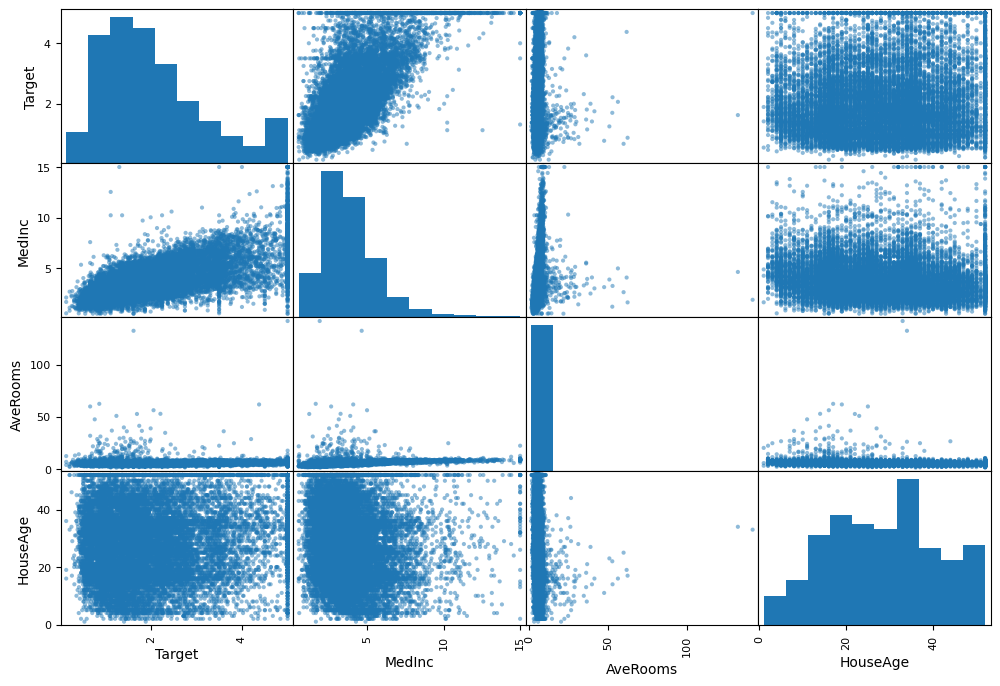

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["Target", "MedInc", "AveRooms", "HouseAge"]
scatter_matrix(df_train_set[attributes], figsize=(12, 8))

<Axes: xlabel='MedInc', ylabel='Target'>

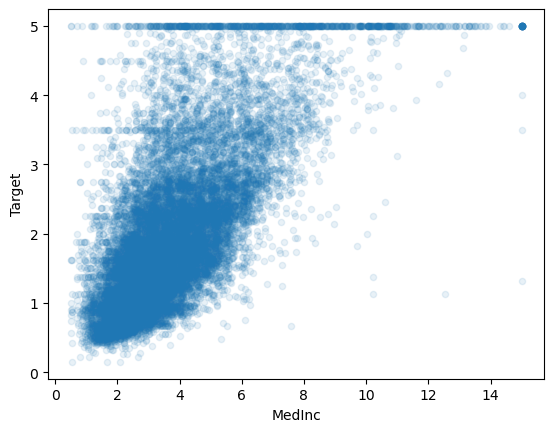

In [20]:
# The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot
df_train_set.plot(kind="scatter", x="MedInc", y="Target",alpha=0.1)

# Analysis:
1. The correlation is very strong. We can clearly see the upward trend and the points are not too dispersed. 
2. There is a price cap is clearly visible as a horizontal line at Target value 5. But this plot reveals other less obvious straight lines: a horizontal line around 4.5, another around 3.5. perhaps one around 2.8, and a few more below that. However the price cap at Target value 5 is most pronounced. So, we will handle that before training the model

# 2. Model Training

In [21]:
df_train_set_lr = df_train_set.copy()
df_test_set_lr = df_test_set.copy()

In [22]:
df_train_set_lr = df_train_set_lr[(df_train_set_lr.Target <= 5) & (df_train_set_lr.HouseAge != 52)]
df_test_set_lr = df_test_set_lr[(df_test_set_lr.Target <= 5) & (df_test_set_lr.HouseAge != 52)]

In [23]:
df_train_set_lr.shape, df_test_set_lr.shape

((14839, 9), (3733, 9))

In [24]:
df_train_set_lr["rooms_per_household"] = df_train_set_lr["AveRooms"] / df_train_set_lr["AveOccup"]
df_train_set_lr["bedrooms_per_room"] = df_train_set_lr["AveBedrms"] / df_train_set_lr["AveRooms"]
df_train_set_lr["population_per_household"] = df_train_set_lr["Population"] / df_train_set_lr["AveOccup"]

In [25]:
df_test_set_lr["rooms_per_household"] = df_test_set_lr["AveRooms"] / df_test_set_lr["AveOccup"]
df_test_set_lr["bedrooms_per_room"] = df_test_set_lr["AveBedrms"] / df_test_set_lr["AveRooms"]
df_test_set_lr["population_per_household"] = df_test_set_lr["Population"] / df_test_set_lr["AveOccup"]

In [26]:
corr_matrix = df_train_set_lr.corr()
corr_matrix["Target"].sort_values(ascending=False)

Target                      1.000000
MedInc                      0.657637
rooms_per_household         0.147156
AveRooms                    0.108559
population_per_household    0.101302
HouseAge                    0.021193
Population                  0.021090
AveOccup                   -0.018741
Longitude                  -0.020556
AveBedrms                  -0.057830
Latitude                   -0.173095
bedrooms_per_room          -0.231313
Name: Target, dtype: float64

# Analysis:
The bedrooms_per_room attribute shows a stronger correlation with the target variable compared to the total number of rooms or bedrooms. This suggests that houses with a lower bedroom-to-room ratio tend to be more expensive. Additionally, the number of rooms per household provides more valuable insight than the total number of rooms in a district, as larger houses are naturally more expensive.

In [27]:
train_labels = df_train_set_lr["Target"].copy()

features_of_interest = ["MedInc", "rooms_per_household", "AveRooms", "population_per_household", "bedrooms_per_room", "Latitude", "Longitude"]
train_data = df_train_set_lr[features_of_interest]

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(df_test_set_lr[features_of_interest])

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data_scaled, train_labels)

LinearRegression()

In [30]:
X_test = test_data_scaled
y_test = df_test_set_lr["Target"].copy()
# X_test_prepared = num_pipeline.transform(X_test)
linear_predictions = lin_reg.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
final_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))

# Calculate MAE
final_mae = mean_absolute_error(y_test, linear_predictions)

# Calculate R² score
final_r2 = r2_score(y_test, linear_predictions)

print("Final RMSE:", final_rmse)
print("Final MAE:", final_mae)
print("Final R² score:", final_r2)

Final RMSE: 0.5804884822338988
Final MAE: 0.4268822984082206
Final R² score: 0.6322264207927293


# Random Forest Regressor

The linear model doesn't appear to be performing very good on the test set. This might suggest that we should use some model that can capture the non-linear relations in the data features.

In [32]:
df_train_set_rf = df_train_set.copy()
df_test_set_rf = df_test_set.copy()

In [33]:
df_train_set_rf = df_train_set_rf[(df_train_set_rf.Target <= 5) & (df_train_set_rf.HouseAge != 52)]
df_test_set_rf = df_test_set_rf[(df_test_set_rf.Target <= 5) & (df_test_set_rf.HouseAge != 52)]

In [34]:
train_data = df_train_set_rf.drop("Target", axis=1)
train_labels = df_train_set_rf["Target"].copy()

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True
                            )
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [37]:
final_model = grid_search.best_estimator_
X_test = df_test_set_rf.drop("Target", axis=1)
y_test = df_test_set_rf["Target"].copy()
# X_test_prepared = num_pipeline.transform(X_test)
rf_predictions = final_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
final_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# Calculate MAE
final_mae = mean_absolute_error(y_test, rf_predictions)

# Calculate R² score
final_r2 = r2_score(y_test, rf_predictions)

print("Final RMSE:", final_rmse)
print("Final MAE:", final_mae)
print("Final R² score:", final_r2)

Final RMSE: 0.43935881131493515
Final MAE: 0.2964137065809447
Final R² score: 0.7893157874506751


# Analysis:

The Random Forest Regressor appears to have performed much better compared to the linear regressor. 

# XGBoost Regressor

Since the Random Forest model was able to perform much better, it is very likely that there are non linear relationships in the given data. Maybe a gradient boosting method can be tried as well. 

In [39]:
df_train_set_xgb = df_train_set.copy()
df_test_set_xgb = df_test_set.copy()

In [40]:
df_train_set_xgb = df_train_set_xgb[(df_train_set_xgb.Target <= 5) & (df_train_set_xgb.HouseAge != 52)]
df_test_set_xgb = df_test_set_xgb[(df_test_set_xgb.Target <= 5) & (df_test_set_xgb.HouseAge != 52)]

In [41]:
train_data = df_train_set_xgb.drop("Target", axis=1)
train_labels = df_train_set_xgb["Target"].copy()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],  # Added feature selection parameter
    'reg_lambda': [0.1, 1.0],  # Regularization to prevent overfitting
    'reg_alpha': [0, 0.1],  # L1 regularization
}

# Initialize the XGBoost regressor with latest best practices
xgb_reg = XGBRegressor(
    objective='reg:squarederror',  # Explicitly set objective
    tree_method='hist',  # Fast histogram-based tree method
    enable_categorical=True,  # Enables categorical feature support (if applicable)
    random_state=42  # Ensures reproducibility
)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1  # Uses all available CPU cores for parallel processing
)

# Fit the model
grid_search_xgb.fit(train_data, train_labels)

# Get the best parameters and estimator
best_params_xgb = grid_search_xgb.best_params_
best_estimator_xgb = grid_search_xgb.best_estimator_

print("Best parameters found: ", best_params_xgb)
print("Best estimator found: ", best_estimator_xgb)

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best estimator found:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [43]:
final_model = grid_search.best_estimator_
X_test = df_test_set_xgb.drop("Target", axis=1)
y_test = df_test_set_xgb["Target"].copy()
# X_test_prepared = num_pipeline.transform(X_test)
rf_predictions = final_model.predict(X_test)

In [44]:
# Make predictions on the test set using the best estimator
xgb_predictions = best_estimator_xgb.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
final_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Calculate MAE
final_mae = mean_absolute_error(y_test, xgb_predictions)

# Calculate R² score
final_r2 = r2_score(y_test, xgb_predictions)

print("Final RMSE:", final_rmse)
print("Final MAE:", final_mae)
print("Final R² score:", final_r2)

Final RMSE: 0.40617986543345186
Final MAE: 0.2750392352976494
Final R² score: 0.8199346726309862


In [48]:
print(best_estimator_xgb.get_xgb_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 1.0, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [49]:
with open('./xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Analysis: 
Based on the evaluation metrics, we can say that the xgboost model performed much better in this case. We will consider this as our final model and save it for deployment

# 3. Save the model

In [46]:
import pickle

# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(best_estimator_xgb, file)